<a href="https://colab.research.google.com/github/Souvik0651/hotel_booking_analysis/blob/main/Hotel_Booking_Analysis_Souvik_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Import Pandas and Numpy in the notebook**

In [48]:
import numpy as np     #import numpy 
import pandas as pd    #import pandas

# **Import matplotlib and seaborn**

In [49]:
#import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the Hotel Bookings.csv kept in the Drive**

In [50]:
#mounting the csv file in colab notebook
from google.colab import drive    
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
#loading the csv file from drive
hotel_booking_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone project -1/Hotel Bookings.csv')

In [52]:
# view the top five row of the file
hotel_booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [53]:
hotel_booking_df.shape

(119390, 32)

In [54]:
# information of dataframe
hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [55]:
#shape of dateFrame
hotel_booking_df.shape

(119390, 32)

In [56]:
# find null values
hotel_booking_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# **Making a copy of a original dataframe so that we work on the copy dataframe and the original data frame doesnot get affected**

In [57]:
# making a copy of original dataframe 
hotel_booking_new= hotel_booking_df.copy()

# **Data cleaning for better understanding of DataFrame**

In [58]:
# replacing NaN value for children column with 0 
hotel_booking_new['children']=hotel_booking_new['children'].fillna(0)

In [59]:
#  adding children and babies in one column
hotel_booking_new['Kids']=(hotel_booking_new['children']+hotel_booking_new['babies']).astype(int)

In [60]:
# finding the total NaN values
hotel_booking_new.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [61]:
# droping the column babies and children as we have added and made new column as kids
# droping company and agent column as they have maximum numbers of NaN values
hotel_booking_new.drop(['babies','children','company','agent'],axis=1,inplace=True)

In [62]:
# droping the rows in which there are NaN values in country column
country_Nan=hotel_booking_new[hotel_booking_new['country'].isna()]
hotel_booking_new.drop(country_Nan.index,inplace=True)

In [63]:
# information for dataframe
hotel_booking_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118902 non-null  object 
 1   is_canceled                     118902 non-null  int64  
 2   lead_time                       118902 non-null  int64  
 3   arrival_date_year               118902 non-null  int64  
 4   arrival_date_month              118902 non-null  object 
 5   arrival_date_week_number        118902 non-null  int64  
 6   arrival_date_day_of_month       118902 non-null  int64  
 7   stays_in_weekend_nights         118902 non-null  int64  
 8   stays_in_week_nights            118902 non-null  int64  
 9   adults                          118902 non-null  int64  
 10  meal                            118902 non-null  object 
 11  country                         118902 non-null  object 
 12  market_segment  

# **Dropping of rows in which no guests have arrived**

In [64]:
guests=hotel_booking_new[(hotel_booking_new['adults']+hotel_booking_new['Kids'])==0]

In [65]:
hotel_booking_new= hotel_booking_new.drop(guests.index)

In [66]:
# new shape of the dataframe
hotel_booking_new.shape

(118732, 29)

# **1.What is the booking percentage between Resort Hotel and City Hotel?**

Text(0.5, 1.0, 'Booking Percentage')

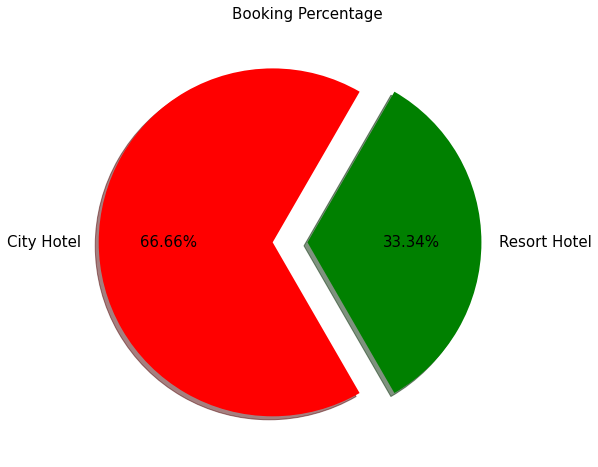

In [67]:
hote_1=hotel_booking_new['hotel'].value_counts()
hote_1.plot.pie(fontsize=15,autopct='%1.2f%%',figsize=(10,8),colors=['r','g'],ylabel='',explode=[0.2,0],shadow=True,startangle = 60)
plt.title('Booking Percentage',fontsize=15)

Number of yearly arrival in hotels

In [68]:
# Total count of arrival date year
hotel_booking_new['arrival_date_year'].value_counts() 

2016    56357
2017    40541
2015    21834
Name: arrival_date_year, dtype: int64

# **Yearly booking for each year**

Text(0.5, 1.0, 'Yearly bookings')

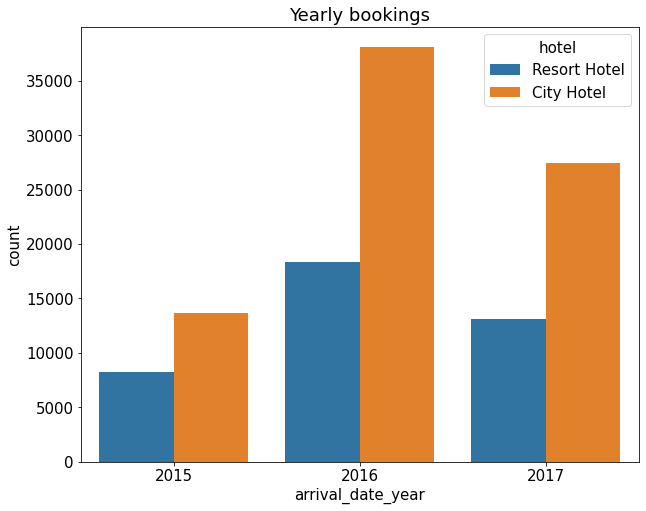

In [69]:
# ploting a bargraph for yearly bookings of city and resort hotels
plt.rcParams['figure.figsize']=(10,8)
sns.countplot(x='arrival_date_year',data=hotel_booking_new,hue='hotel').set_title('Yearly bookings')


# **Bookings which doesnot have any cancelation**

Text(0.5, 1.0, 'Yearly Bookings')

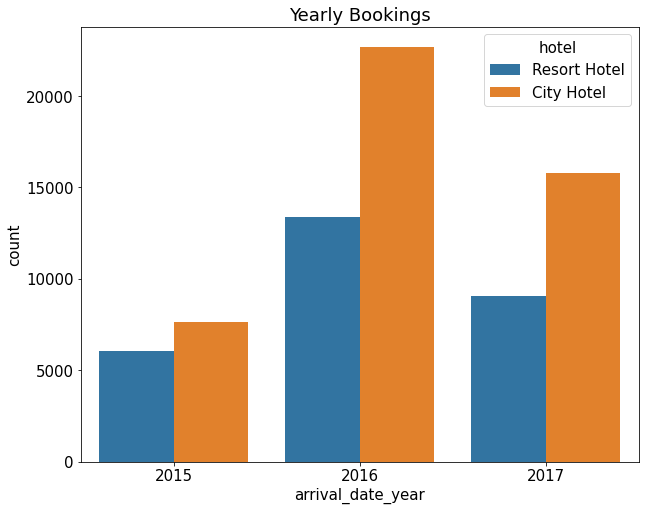

In [70]:
# yearly bookings of hotels which were not cancelled
canceled=hotel_booking_new[hotel_booking_new['is_canceled']==0]
plt.rcParams['figure.figsize']=(10,8)
sns.countplot(x='arrival_date_year',data=canceled,hue='hotel').set_title('Yearly Bookings')

# **How Many Booking Were Cancelled?**

Text(0.5, 1.0, 'Yearly Cancellation')

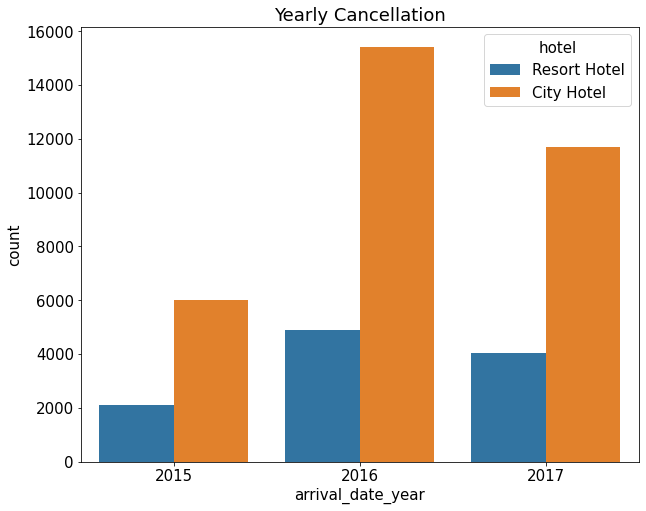

In [71]:
not_canceled=hotel_booking_new[hotel_booking_new['is_canceled']!=0]
plt.rcParams['figure.figsize']=(10,8)
sns.countplot(x='arrival_date_year',data=not_canceled,hue='hotel').set_title('Yearly Cancellation')

In [72]:
hotel_booking_new['is_canceled'].unique()

array([0, 1])

In [73]:
hotel_booking_new['is_canceled'].replace({0:'No',1:'Yes'},inplace= True)

Text(0.5, 1.0, 'Cancellation')

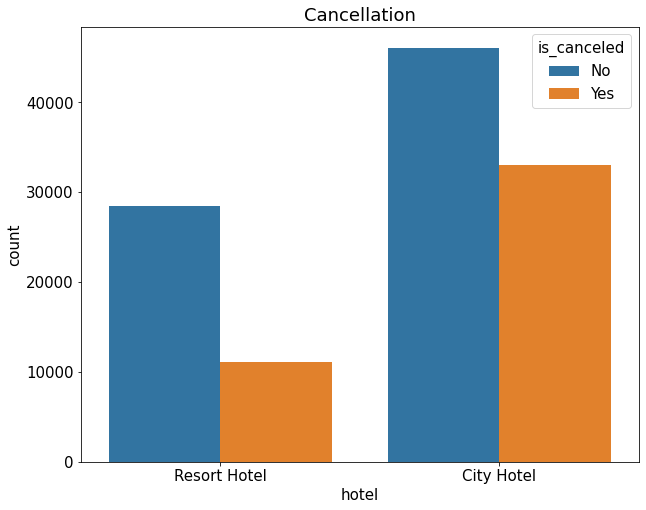

In [74]:
sns.countplot(hue ="is_canceled",data= hotel_booking_new, x='hotel').set_title('Cancellation')

# **Which is the busiest month for hotels?**

In [75]:
hotel_booking_new.groupby(['hotel'])['arrival_date_month'].value_counts()

hotel         arrival_date_month
City Hotel    August                8967
              May                   8221
              July                  8071
              June                  7885
              October               7580
              April                 7469
              September             7392
              March                 6434
              February              4950
              November              4334
              December              4114
              January               3730
Resort Hotel  August                4873
              July                  4540
              April                 3569
              May                   3547
              October               3502
              March                 3279
              September             3067
              February              3047
              June                  3032
              December              2596
              November              2397
              January   

Text(0.5, 1.0, 'Busiest month')

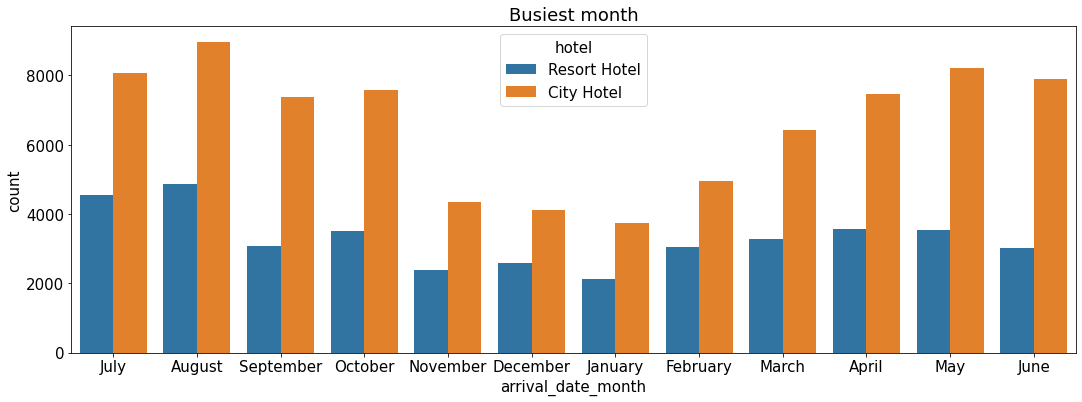

In [76]:
plt.figure(figsize=(18,6))
sns.countplot(x='arrival_date_month', hue='hotel', data= hotel_booking_new).set_title('Busiest month')

From which country most guests come?


In [77]:
top10=hotel_booking_new['country'].value_counts().head(10).index.tolist()
top10

['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD']

In [78]:
top_10=hotel_booking_new[hotel_booking_new['country'].isin(top10)]

Text(0.5, 1.0, ' Top countries with maximum hotel bookings')

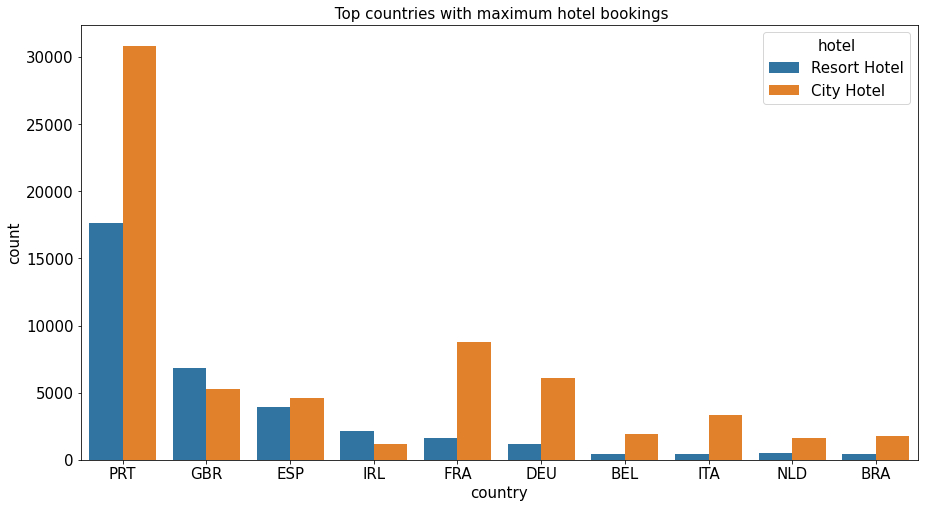

In [79]:
plt.rcParams['figure.figsize']=(15,8)
plt.xlabel('country',fontsize=15)
plt.ylabel('counts',fontsize=15)
sns.countplot(x='country',hue='hotel',data=top_10).set_title(' Top countries with maximum hotel bookings',fontsize=15)

How Long People Stay in the hotel?


In [80]:
hotel_booking_new['stays_in_weekend_nights'].agg('max')

16

In [81]:
hotel_booking_new['stays_in_week_nights'].agg('max')

40

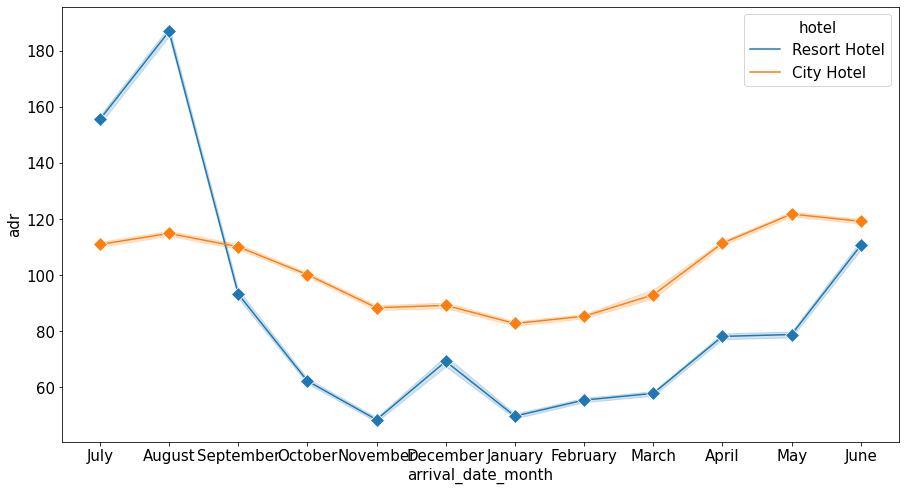

In [82]:
sns.lineplot(x='arrival_date_month',y='adr',hue='hotel',data=hotel_booking_new,marker='D',markersize=10)

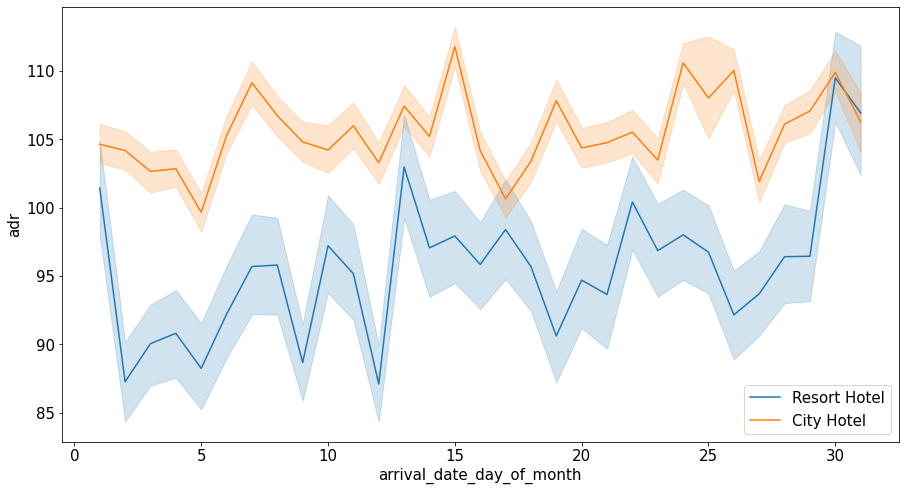

In [83]:
sns.lineplot(x='arrival_date_day_of_month',y='adr',hue='hotel',data=hotel_booking_new)
plt.legend(loc="lower right")

Which was the most booked accommodation type (Single, Couple, Family)?

which is the most market segment?

In [84]:
market_segment=hotel_booking_new['market_segment'].value_counts()
w=market_segment.index.tolist()

In [95]:
v=hotel_booking_new['market_segment'].value_counts().tolist()
sum=0
for i in v:
  sum=sum+i

In [96]:
tot=[]
for i in v:
  tot.append(str(round(i*100/sum,1))+"%")
tot

['47.4%', '20.3%', '16.7%', '10.5%', '4.3%', '0.6%', '0.2%', '0.0%']

In [97]:
q=list(zip(w,tot))
q

[('Online TA', '47.4%'),
 ('Offline TA/TO', '20.3%'),
 ('Groups', '16.7%'),
 ('Direct', '10.5%'),
 ('Corporate', '4.3%'),
 ('Complementary', '0.6%'),
 ('Aviation', '0.2%'),
 ('Undefined', '0.0%')]

In [98]:
l=[]
for i in q:
  n = str(i).replace(",","=")
  l.append(n)
l

["('Online TA'= '47.4%')",
 "('Offline TA/TO'= '20.3%')",
 "('Groups'= '16.7%')",
 "('Direct'= '10.5%')",
 "('Corporate'= '4.3%')",
 "('Complementary'= '0.6%')",
 "('Aviation'= '0.2%')",
 "('Undefined'= '0.0%')"]

In [99]:
l=np.array(l)
l.shape

(8,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


(-1.3419020465032634,
 1.3332565650398753,
 -1.3470086485819086,
 1.321286126122948)

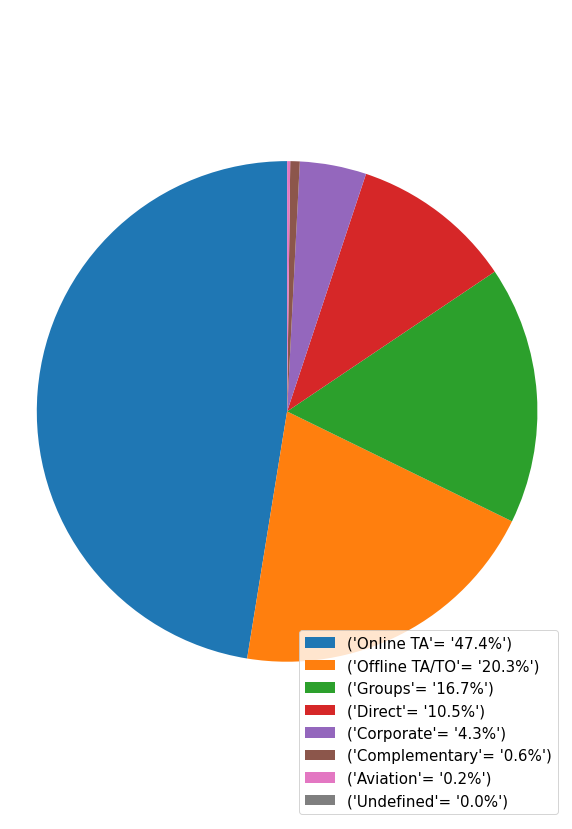

In [100]:

plt.rcParams['figure.figsize']=(10,15)
plt.rcParams['font.size']=15
# x=market_segment.plot.pie(fontsize=12,title='Market Segment',ylabel='',explode=[0,0.2,0.2,0.2,0.2,0.2,0.2,0])
patches, texts = plt.pie(market_segment, startangle=90, radius=1.2)
plt.legend(patches,labels=l,loc='lower right')
plt.axis('equal')

What is the relationship between lead time and cancellation?


In [101]:
x=hotel_booking_new['hotel'].value_counts().sum()


In [102]:
rel_lead_canc=hotel_booking_new.groupby(['lead_time','is_canceled'])['hotel'].size().unstack().reset_index()
rel_lead_canc.head(2)

is_canceled,lead_time,No,Yes
0,0,5739.0,413.0
1,1,3064.0,316.0


In [103]:
plt.rcParams['figure.figsize']=(15,8)
lead_time=rel_lead_canc.loc[:,['lead_time']]
lt=lead_time.lead_time.to_list()

In [104]:
No=rel_lead_canc.No.fillna(0)
Yes=rel_lead_canc.Yes.fillna(0)

Text(0.5, 1.0, 'relation between lead time and cancellation')

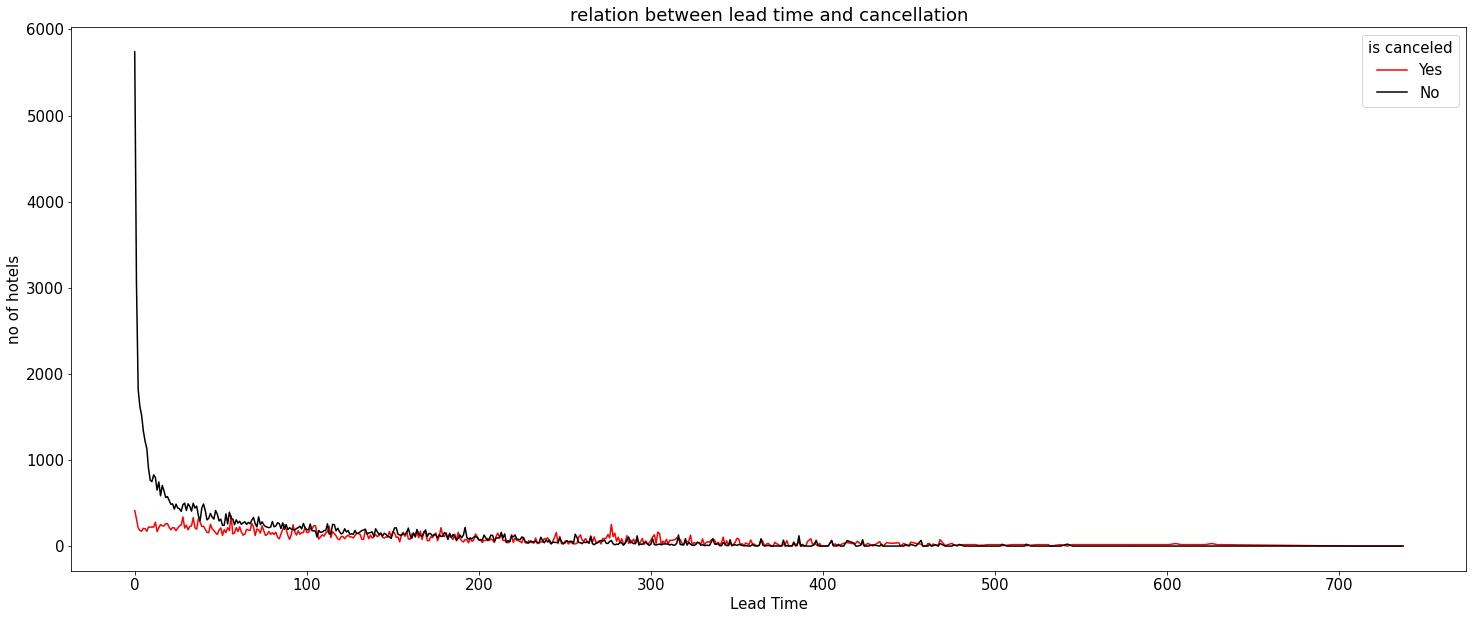

In [105]:
plt.rcParams['figure.figsize']=(25,10)
plt.plot(lt,Yes,color='r')
plt.plot(lt,No,color='k')
plt.xlabel('Lead Time')
plt.ylabel('no of hotels')
plt.legend(title='is canceled',labels=['Yes','No'])
plt.title('relation between lead time and cancellation')

Market segment has any impact on repeated customer?

In [106]:
hotel_booking_new['is_repeated_guest'].replace({0:'No',1:'Yes'},inplace=True)

In [107]:
repeated_quest=hotel_booking_new[hotel_booking_new['is_repeated_guest']=='Yes']
not_repeated_quest=hotel_booking_new[hotel_booking_new['is_repeated_guest']=='No']

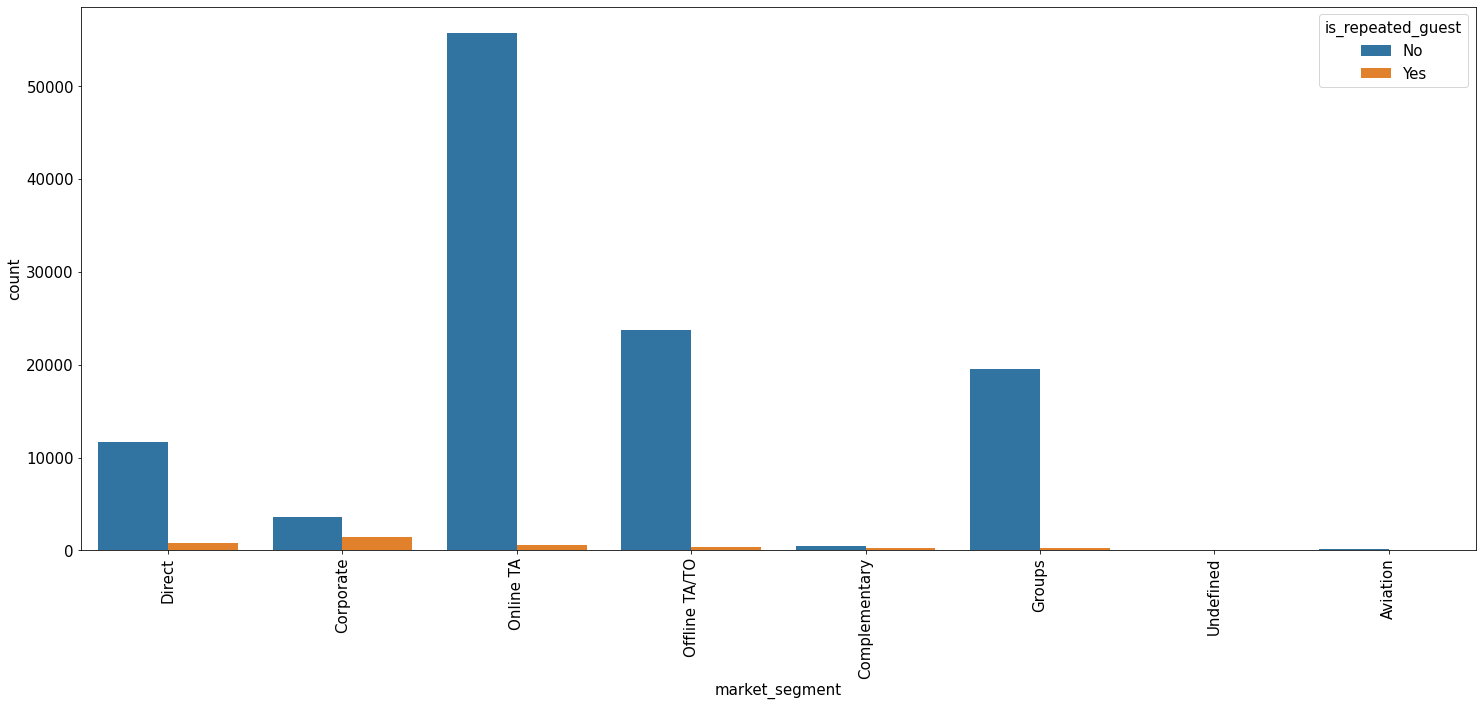

In [108]:
plt.xticks(rotation=90)
sns.countplot(x='market_segment',hue='is_repeated_guest',data=hotel_booking_new)

If guests are assgined different room then reserved are they cancelling?


In [109]:
hotel_booking_new['required_car_parking_spaces'].value_counts()


0    111429
1      7270
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [91]:
x_car=hotel_booking_new['required_car_parking_spaces'].value_counts().index.tolist()
y_car=hotel_booking_new['required_car_parking_spaces'].value_counts().tolist()

Text(0.5, 1.0, 'Required car parking spaces')

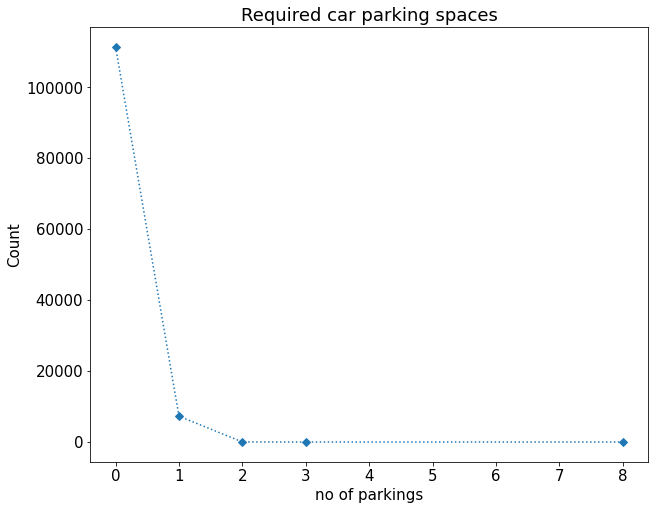

In [92]:
plt.rcParams['figure.figsize']=(10,8)
plt.plot(x_car,y_car,marker='D',ls='dotted')
plt.ylabel('Count')
plt.xlabel("no of parkings")
plt.title('Required car parking spaces')

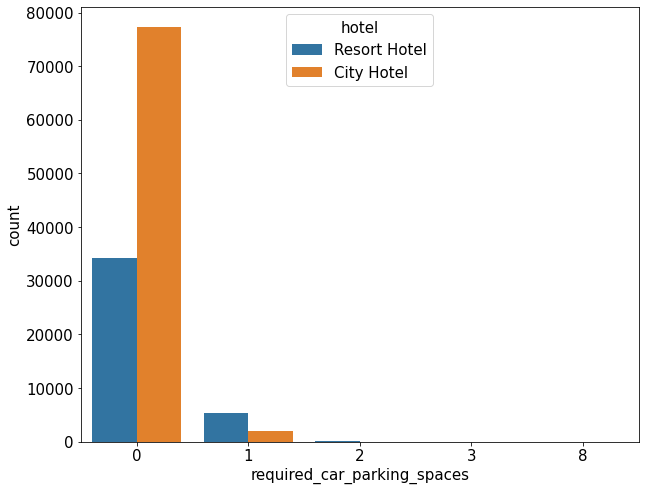

In [93]:
sns.countplot(x='required_car_parking_spaces',hue='hotel',data= hotel_booking_new)

In [94]:
hotel_booking_new.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Kids'],
      dtype='object')

In [110]:
hotel_booking_new['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [112]:
check_out=hotel_booking_new[hotel_booking_new['reservation_status']=='Check-Out']
check_out=check_out[['reservation_status_date','arrival_date_day_of_month','arrival_date_month','arrival_date_year']]
check_out.head()

,reservation_status_date,arrival_date_day_of_month,arrival_date_month,arrival_date_year
0,2015-07-01,1,July,2015
1,2015-07-01,1,July,2015
2,2015-07-02,1,July,2015
3,2015-07-02,1,July,2015
4,2015-07-03,1,July,2015


In [ ]:
from datetime import datetime
check_out['reservation_status_date']=pd.to_datetime(check_out['reservation_status_date'], format='%Y-%m-%d')
check_out['reservation_status_date']
check_in=check_out.iloc[:,1:]
day=check_in['arrival_date_day_of_month'].tolist()
month=check_in['arrival_date_month'].tolist()
year=check_in['arrival_date_year'].tolist()
check_in
day

In [117]:
check_in_date=list(zip(day,month,year))
check_in_date=np.array(check_in_date)
check_in_date

array([['1', 'July', '2015'],
       ['1', 'July', '2015'],
       ['1', 'July', '2015'],
       ...,
       ['31', 'August', '2017'],
       ['31', 'August', '2017'],
       ['29', 'August', '2017']], dtype='<U21')

In [118]:
check_date=[]
for i in check_in_date:
  v=i[2]+'-'+i[1][:3]+'-'+i[0]
  check_date.append(datetime.strptime(v,'%Y-%b-%d'))
check_date
  


[datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.da

In [121]:
check_out['arrival_date']=check_date

In [122]:
check_out.head()

,reservation_status_date,arrival_date_day_of_month,arrival_date_month,arrival_date_year,arrival_date
0,2015-07-01,1,July,2015,2015-07-01
1,2015-07-01,1,July,2015,2015-07-01
2,2015-07-02,1,July,2015,2015-07-01
3,2015-07-02,1,July,2015,2015-07-01
4,2015-07-03,1,July,2015,2015-07-01


In [144]:
check_in_out=check_out.drop(check_out.iloc[:,1:4],axis=1)
check_in_out=check_in_out.assign(Total_stay= lambda x:(x['reservation_status_date']-x['arrival_date']))
check_in_out['adr']=hotel_booking_new['adr']
check_in_out.shape

(74590, 4)

In [152]:
check_in_out['Total_stay'].unique()

array([               0,   86400000000000,  172800000000000,
        345600000000000,  432000000000000,  518400000000000,
        604800000000000, 1296000000000000,  950400000000000,
       1209600000000000,  259200000000000,  691200000000000,
        777600000000000,  864000000000000, 1123200000000000,
       1036800000000000, 3974400000000000, 1555200000000000,
       2419200000000000, 1814400000000000, 1468800000000000,
       1900800000000000, 2505600000000000, 1641600000000000,
       3628800000000000, 1382400000000000, 2592000000000000,
       3024000000000000, 1987200000000000, 3888000000000000,
       4838400000000000, 2160000000000000, 3283200000000000,
       1728000000000000, 4147200000000000, 2073600000000000,
       2937600000000000], dtype='timedelta64[ns]')

In [154]:

stay_list=Total_stay1["Total_stay"].tolist()
vv=[]
for i in str(stay_list).split(","):
  vv.append(i[12:14])
set(vv)

{'0 ',
 '1 ',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2 ',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '28',
 '29',
 '3 ',
 '30',
 '34',
 '35',
 '38',
 '4 ',
 '42',
 '45',
 '46',
 '48',
 '5 ',
 '56',
 '6 ',
 '7 ',
 '8 ',
 '9 '}

In [155]:
check_in_out['Total_stay1']=vv
check_in_out

,reservation_status_date,arrival_date,Total_stay,adr,Total_stay1
0,2015-07-01,2015-07-01,0 days,0.00,0
1,2015-07-01,2015-07-01,0 days,0.00,0
2,2015-07-02,2015-07-01,1 days,75.00,1
3,2015-07-02,2015-07-01,1 days,75.00,1
4,2015-07-03,2015-07-01,2 days,98.00,2
...,...,...,...,...,...
119385,2017-09-06,2017-08-30,7 days,96.14,7
119386,2017-09-07,2017-08-31,7 days,225.43,7
119387,2017-09-07,2017-08-31,7 days,157.71,7
119388,2017-09-07,2017-08-31,7 days,104.40,7


In [199]:
mean=check_in_out.groupby(['Total_stay1']).mean()
# Total_stay1=check_in_out.assign(Total_stay1=lambda x:str(x['Total_stay']))
# r=mean.tolist()
# r
ry=mean['adr'].round(2).tolist()
mean=mean.sort_index
mean

<bound method DataFrame.sort_index of                     adr
Total_stay1            
0              4.395093
1             92.789706
10           102.161269
11           101.473883
12           101.853115
13           100.567727
14            87.971080
15            90.948333
16           100.342222
17            93.919333
18            95.865000
19            74.273333
2            101.330678
20            87.700000
21            68.437778
22            78.198889
23           118.935000
24           106.000000
25            55.065714
28            57.078636
29            34.100000
3            104.350478
30            57.500000
34            93.000000
35            39.876000
38             0.260000
4            103.318279
42            35.520000
45            42.110000
46             0.000000
48             0.000000
5            108.317439
56            28.790000
6            115.256916
7             99.823914
8            107.577757
9            110.671667>

In [193]:
tx=mean.index.tolist().sort()
len(tx)

TypeError: ignored

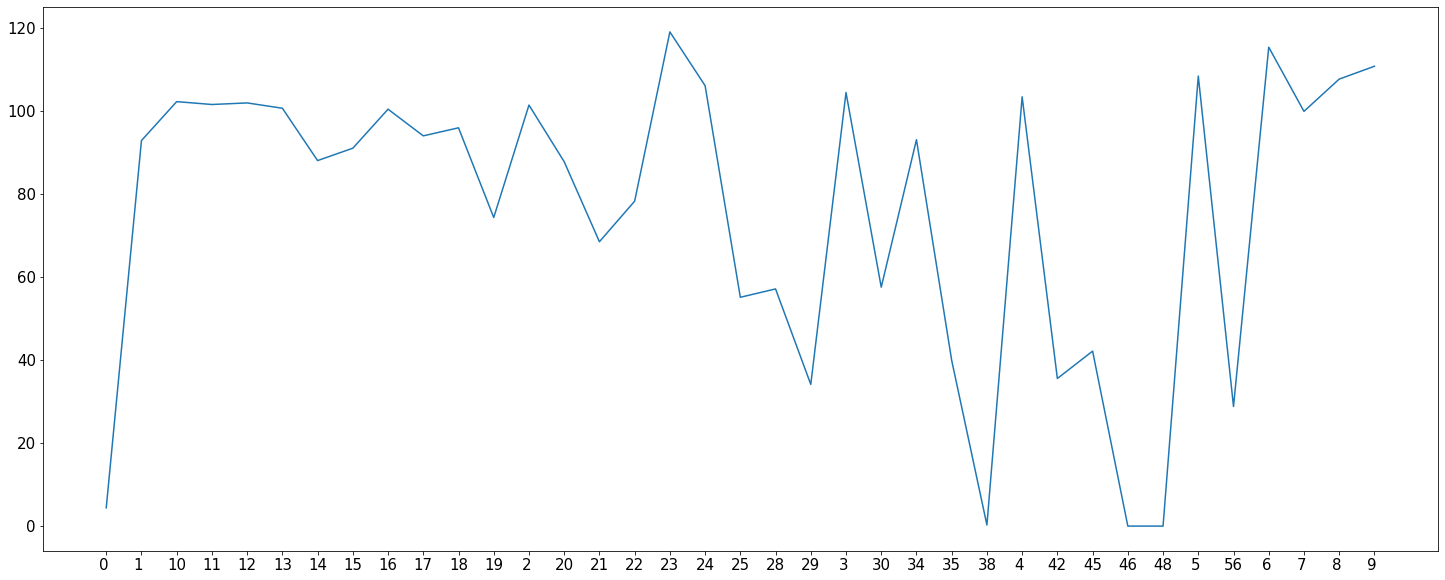

In [192]:

plt.plot(tx,ry)


In [ ]:
pd.to_numeric(pd.to_dateti(mean['t'])